In [ ]:
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn scipy imblearn optuna joblib praat-parselmouth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 8.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

def load_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
    df = pd.read_csv(url)
    df['label'] = df['status']
    df['subject'] = df['name']
    return df.drop(columns=['name', 'status'])

# Load and inspect
df = load_data()

print("🧾 DataFrame Info:")
print(df.info())

print("\n🧠 Column Names:")
print(df.columns.tolist())

print("\n📊 Sample Data:")
print(df.head())

print("\n📈 Basic Stats:")
print(df.describe())


🧾 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-

🔄 Loading dataset...

📊 Class Distribution:
label
1    147
0     48
Name: count, dtype: int64

🔧 Performing feature engineering...

🔎 Selecting features using RFE...


[I 2025-04-06 20:27:14,518] A new study created in memory with name: no-name-193417c9-473f-4eaf-bc25-43ad08b26bb6
[I 2025-04-06 20:27:14,619] Trial 0 finished with value: 0.9924242424242424 and parameters: {'learning_rate': 0.16015794015987217, 'max_depth': 7, 'n_estimators': 366, 'subsample': 0.9521728872948869, 'colsample_bytree': 0.7773902408430257, 'gamma': 0.09620981435413968}. Best is trial 0 with value: 0.9924242424242424.
[I 2025-04-06 20:27:14,686] Trial 1 finished with value: 0.9929292929292929 and parameters: {'learning_rate': 0.10619794902147692, 'max_depth': 9, 'n_estimators': 116, 'subsample': 0.8144976811964673, 'colsample_bytree': 0.6020122533214533, 'gamma': 0.02159866427074575}. Best is trial 1 with value: 0.9929292929292929.



🔧 Optimizing XGBoost with Optuna...


[I 2025-04-06 20:27:14,823] Trial 2 finished with value: 0.9924242424242424 and parameters: {'learning_rate': 0.022365007708881723, 'max_depth': 8, 'n_estimators': 172, 'subsample': 0.722445929766676, 'colsample_bytree': 0.7525022516466762, 'gamma': 0.06511057252901338}. Best is trial 1 with value: 0.9929292929292929.
[I 2025-04-06 20:27:15,017] Trial 3 finished with value: 0.9893939393939394 and parameters: {'learning_rate': 0.2699512819887032, 'max_depth': 8, 'n_estimators': 297, 'subsample': 0.6916057004228549, 'colsample_bytree': 0.9574808281722786, 'gamma': 0.29234629090592595}. Best is trial 1 with value: 0.9929292929292929.
[I 2025-04-06 20:27:15,099] Trial 4 finished with value: 0.9909090909090909 and parameters: {'learning_rate': 0.1672514351403751, 'max_depth': 5, 'n_estimators': 294, 'subsample': 0.7760701262539801, 'colsample_bytree': 0.6599237617369502, 'gamma': 0.0635382005778189}. Best is trial 1 with value: 0.9929292929292929.
[I 2025-04-06 20:27:15,168] Trial 5 finishe


🤖 Training ensemble model...

📊 Model Evaluation:
✅ Accuracy: 94.38%
✅ ROC AUC: 99.04%

📋 Classification Report:
              precision    recall  f1-score   support

     Healthy       0.92      0.98      0.95        45
 Parkinson's       0.98      0.91      0.94        44

    accuracy                           0.94        89
   macro avg       0.95      0.94      0.94        89
weighted avg       0.95      0.94      0.94        89



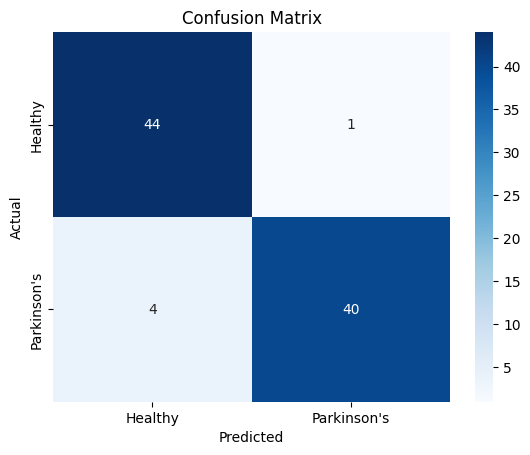

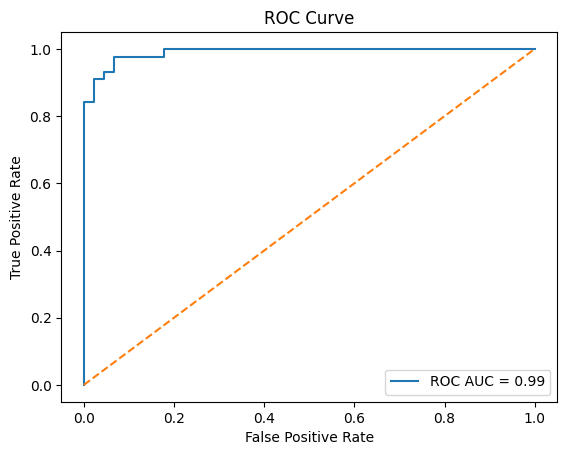


📈 Cross-validated ROC AUC: 0.9790 ± 0.0112

💾 Model saved to: /content/drive/My Drive/parkinsons_ensemble_model.pkl

🎉 Enhanced model training complete!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import optuna
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load dataset
print("🔄 Loading dataset...")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url)

# Basic preprocessing
df['label'] = df['status']
df['subject'] = df['name']
df.drop(columns=['name', 'status'], inplace=True)

# Class distribution
print("\n📊 Class Distribution:")
print(df['label'].value_counts())

# Feature engineering
print("\n🔧 Performing feature engineering...")
X = df.drop(columns=['label', 'subject'])
y = df['label']

X['jitter_shimmer_ratio'] = X['MDVP:Jitter(%)'] / (X['MDVP:Shimmer'] + 1e-10)
X['nhr_hnr_ratio'] = X['NHR'] / (X['HNR'] + 1e-10)
X['pitch_variation'] = X['MDVP:Fhi(Hz)'] - X['MDVP:Flo(Hz)']
X['mean_pitch'] = X[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']].mean(axis=1)
X['pitch_range'] = X['MDVP:Fhi(Hz)'] - X['MDVP:Flo(Hz)']
X['jitter_ppq_apq'] = X['MDVP:Jitter(Abs)'] * X['MDVP:PPQ']
for col in ['MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR']:
    X[f'log_{col}'] = np.log1p(X[col])
    X[f'sqrt_{col}'] = np.sqrt(X[col])
X['jitter_stats'] = X[['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'Jitter:DDP']].mean(axis=1)
X['shimmer_stats'] = X[['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']].mean(axis=1)

# SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Power transform and scale
power = PowerTransformer()
X_train = power.fit_transform(X_train)
X_test = power.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# RFE for feature selection
print("\n🔎 Selecting features using RFE...")
base_estimator = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
rfe_selector = RFE(base_estimator, n_features_to_select=20)
X_train_selected = rfe_selector.fit_transform(X_train, y_train)
X_test_selected = rfe_selector.transform(X_test)
selected_features = X.columns[rfe_selector.support_].tolist()

# Optuna optimization
print("\n🔧 Optimizing XGBoost with Optuna...")

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.3),
        'eval_metric': 'logloss',
        'use_label_encoder': False,
        'random_state': 42
    }
    model = XGBClassifier(**params)
    model.fit(X_train_selected, y_train)
    proba = model.predict_proba(X_test_selected)[:, 1]
    return roc_auc_score(y_test, proba)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
best_params = study.best_params
best_params['eval_metric'] = 'logloss'
best_params['use_label_encoder'] = False
best_params['random_state'] = 42

# Ensemble classifier
print("\n🤖 Training ensemble model...")
xgb_model = XGBClassifier(**best_params)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
lr_model = LogisticRegression(max_iter=1000)

ensemble = VotingClassifier(
    estimators=[('xgb', xgb_model), ('rf', rf_model), ('lr', lr_model)],
    voting='soft'
)
ensemble.fit(X_train_selected, y_train)

# Evaluation
print("\n📊 Model Evaluation:")
y_pred = ensemble.predict(X_test_selected)
y_proba = ensemble.predict_proba(X_test_selected)[:, 1]

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"✅ ROC AUC: {roc_auc_score(y_test, y_proba):.2%}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Healthy", "Parkinson's"]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Healthy", "Parkinson's"],
            yticklabels=["Healthy", "Parkinson's"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Cross-validation ROC AUC
cv_scores = cross_val_score(ensemble, X_train_selected, y_train, cv=5, scoring='roc_auc')
print(f"\n📈 Cross-validated ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


# Save model
save_path = '/content/drive/My Drive/parkinsons_ensemble_model.pkl'
joblib.dump({
    'model': ensemble,  # ✅ This is your trained ensemble model
    'power_transformer': power,
    'scaler': scaler,
    'rfe_selector': rfe_selector,
    'feature_names': selected_features
}, save_path)

print(f"\n💾 Model saved to: {save_path}")
print("\n🎉 Enhanced model training complete!")



In [ ]:
import numpy as np
import pandas as pd
import parselmouth
import joblib
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import RFE
from scipy.stats import skew, kurtosis
from google.colab import drive, files
import warnings
import os

warnings.filterwarnings('ignore')

# Mount Google Drive
drive.mount('/content/drive')

class ParkinsonVoiceAnalyzer:
    def __init__(self, model_path):
        self.default_feature_value = 0.0
        self.model_components = {}
        self.load_model(model_path)
        self.initialize_feature_extractors()

    def initialize_feature_extractors(self):
        self.feature_extractors = {
            'pitch': self.extract_pitch_features,
            'intensity': self.extract_intensity_features,
            'harmonicity': self.extract_harmonicity_features,
            'mfcc': self.extract_mfcc_features,
            'formants': self.extract_formant_features,
        }

    def load_model(self, model_path):
        try:
            self.model_components = joblib.load(model_path)
            print("✅ Model loaded successfully")

            self.model = self.model_components.get('model')
            self.power_transformer = self.model_components.get('power_transformer')
            self.scaler = self.model_components.get('scaler')
            self.rfe_selector = self.model_components.get('rfe_selector')
            self.selected_features = self.model_components.get('selected_features', [])

            if self.power_transformer and hasattr(self.power_transformer, 'get_feature_names_out'):
                self.all_features = self.power_transformer.get_feature_names_out()
                print(f"📋 Inferred {len(self.all_features)} initial features from power_transformer.")
            elif self.scaler and hasattr(self.scaler, 'get_feature_names_out'):
                self.all_features = self.scaler.get_feature_names_out()
                print(f"📋 Inferred {len(self.all_features)} initial features from scaler.")
            else:
                raise Exception("❌ Could not infer initial features from transformers.")

            if not self.selected_features and self.rfe_selector and hasattr(self.rfe_selector, 'get_feature_names_out'):
                selected_indices = [int(col[1:]) for col in self.rfe_selector.get_feature_names_out() if col.startswith('x')]
                self.selected_features = [self.all_features[i] for i in selected_indices]
                print(f"⚠️ No 'selected_features' found. Inferred from rfe_selector.")
            elif not self.selected_features:
                self.selected_features = self.all_features[:20]
                print(f"⚠️ No 'selected_features' found. Using first 20 as fallback.")

            print(f"📋 Using {len(self.selected_features)} selected features.")
        except Exception as e:
            raise Exception(f"❌ Failed to load model: {str(e)}")

    def safe_divide(self, numerator, denominator):
        return numerator / (denominator + 1e-10) if denominator != 0 else 0

    def extract_pitch_features(self, sound):
        features = {}
        try:
            pitch = sound.to_pitch(time_step=0.01, pitch_floor=50, pitch_ceiling=600)
            pitch_values = pitch.selected_array['frequency']
            pitch_values = pitch_values[pitch_values > 0]
            if len(pitch_values) > 0:
                features['MDVP:Fo(Hz)'] = np.mean(pitch_values)
                features['MDVP:Fhi(Hz)'] = np.max(pitch_values)
                features['MDVP:Flo(Hz)'] = np.min(pitch_values)
                features['PPE'] = np.std(pitch_values) / (np.mean(pitch_values) + 1e-10)
                diffs = np.diff(pitch_values)
                if len(diffs) > 0:
                    features['MDVP:Jitter(%)'] = np.mean(np.abs(diffs)) / np.mean(pitch_values)
                    features['MDVP:Jitter(Abs)'] = np.mean(np.abs(diffs))
                    features['MDVP:PPQ'] = np.mean(np.abs(diffs[:5])) / np.mean(pitch_values[:4]) if len(pitch_values) >= 5 else 0
                    features['MDVP:RAP'] = np.mean(np.abs(diffs[:3])) / np.mean(pitch_values[:3]) if len(pitch_values) >= 3 else 0
                    features['Jitter:DDP'] = 3 * features.get('MDVP:RAP', 0)
        except Exception as e:
            print(f"⚠️ Pitch extraction error: {e}")
        return features

    def extract_intensity_features(self, sound):
        features = {}
        try:
            intensity = sound.to_intensity(time_step=0.01)
            amp = intensity.values.flatten()
            if len(amp) > 1:
                amp_diffs = np.diff(amp)
                features['MDVP:Shimmer'] = np.mean(np.abs(amp_diffs)) / np.mean(amp)
                features['MDVP:Shimmer(dB)'] = 20 * np.log10(np.mean(np.abs(amp_diffs)) / (np.mean(amp) + 1e-10))
                features['Shimmer:APQ3'] = np.mean(np.abs(amp_diffs[:3])) / np.mean(amp[:3]) if len(amp) >= 3 else 0
                features['Shimmer:APQ5'] = np.mean(np.abs(amp_diffs[:5])) / np.mean(amp[:4]) if len(amp) >= 5 else 0
                features['MDVP:APQ'] = np.mean(np.abs(amp_diffs)) / np.mean(amp)
                features['sqrt_MDVP:Shimmer'] = np.sqrt(features.get('MDVP:Shimmer', 0))
        except Exception as e:
            print(f"⚠️ Intensity extraction error: {e}")
        return features

    def extract_harmonicity_features(self, sound):
        features = {}
        try:
            harmonicity = sound.to_harmonicity_cc()
            values = harmonicity.values[harmonicity.values > 0]
            if len(values) > 0:
                features['HNR'] = np.mean(values)
                features['NHR'] = 1 / (features['HNR'] + 1e-10)
                features['sqrt_NHR'] = np.sqrt(features['NHR'])
        except Exception as e:
            print(f"⚠️ Harmonicity extraction error: {e}")
        return features

    def extract_mfcc_features(self, sound):
        features = {}
        try:
            mfcc = sound.to_mfcc().to_array()
            features['RPDE'] = np.std(mfcc) / (np.mean(mfcc) + 1e-10)
            features['spread1'] = np.std(mfcc)
            features['spread2'] = np.var(mfcc)
            features['D2'] = np.max(mfcc) - np.min(mfcc) if mfcc.size > 0 else 0.0
            print(f"📊 D2 calculated: {features['D2']}")
        except Exception as e:
            print(f"⚠️ MFCC extraction error: {e}")
        return features

    def extract_formant_features(self, sound):
        features = {}
        try:
            formants = sound.to_formant_burg()
            f1_values = []
            f2_values = []
            if formants.n_frames > 0:
                for i in range(formants.n_frames):
                    time = formants.xs()[i]
                    f1 = formants.get_value_at_time(1, time) if formants.get_value_at_time(1, time) > 0 else 0
                    f2 = formants.get_value_at_time(2, time) if formants.get_value_at_time(2, time) > 0 else 0
                    if f1 > 0: f1_values.append(f1)
                    if f2 > 0: f2_values.append(f2)
            if f1_values and f2_values:
                features['DFA'] = np.mean(f1_values) / (np.mean(f2_values) + 1e-10)
            else:
                print("⚠️ Warning: Insufficient formant data for DFA calculation")
        except Exception as e:
            print(f"⚠️ Formant extraction error: {e}")
        return features

    def extract_voice_features(self, audio_path):
        try:
            sound = parselmouth.Sound(audio_path)
            if sound.values.size == 0:
                raise ValueError("Empty audio data")

            features = {feat: self.default_feature_value for feat in self.all_features}
            for extractor_name, extractor_func in self.feature_extractors.items():
                features.update(extractor_func(sound))

            if 'MDVP:Jitter(%)' in features and 'MDVP:Shimmer' in features:
                features['jitter_shimmer_ratio'] = self.safe_divide(features['MDVP:Jitter(%)'], features['MDVP:Shimmer'])
            if 'MDVP:Fhi(Hz)' in features and 'MDVP:Flo(Hz)' in features:
                features['pitch_variation'] = features['MDVP:Fhi(Hz)'] - features['MDVP:Flo(Hz)']
            if 'MDVP:Jitter(Abs)' in features and 'MDVP:PPQ' in features:
                features['jitter_ppq_apq'] = features['MDVP:Jitter(Abs)'] * features['MDVP:PPQ']

            return features
        except Exception as e:
            print(f"❌ Feature extraction error: {e}")
            return None

    def prepare_features(self, features_dict):
        try:
            features_df = pd.DataFrame([features_dict])
            for feat in self.all_features:
                if feat not in features_df.columns:
                    features_df[feat] = self.default_feature_value
            features_df = features_df[self.all_features]

            if self.power_transformer:
                features_df = self.power_transformer.transform(features_df)
            if self.scaler:
                features_df = self.scaler.transform(features_df)
            if self.rfe_selector:
                features_df = self.rfe_selector.transform(features_df)

            return features_df
        except Exception as e:
            raise Exception(f"Feature preparation failed: {str(e)}")

    def predict_parkinson(self, audio_path):
        try:
            if not os.path.exists(audio_path):
                return {'status': 'error', 'message': 'File not found', 'file_name': os.path.basename(audio_path)}

            features = self.extract_voice_features(audio_path)
            if not features:
                return {'status': 'error', 'message': 'Feature extraction failed', 'file_name': os.path.basename(audio_path)}

            features_final = self.prepare_features(features)

            prediction = self.model.predict(features_final)[0]
            proba = self.model.predict_proba(features_final)[0][1] if hasattr(self.model, 'predict_proba') else 0.5
            confidence = 'High' if proba > 0.8 or proba < 0.2 else 'Medium' if proba > 0.6 or proba < 0.4 else 'Low'

            return {
                'status': 'success',
                'prediction': "Parkinson's" if prediction == 1 else 'Healthy',
                'probability': float(proba),
                'confidence': confidence,
                'file_name': os.path.basename(audio_path),
                'features_used': features_final.shape[1],
                'extracted_features': len(features)
            }
        except Exception as e:
            return {'status': 'error', 'message': str(e), 'file_name': os.path.basename(audio_path)}

# ============================
# 🔽 Run this block in Colab
# ============================
if __name__ == "__main__":
    model_path = '/content/drive/My Drive/parkinsons_ensemble_model.pkl'
    analyzer = ParkinsonVoiceAnalyzer(model_path)

    # Upload audio file
    uploaded = files.upload()

    if uploaded:
        uploaded_file_path = list(uploaded.keys())[0]
        print(f"📂 Uploaded file: {uploaded_file_path}")

        result = analyzer.predict_parkinson(uploaded_file_path)

        if result['status'] == 'success':
            print(f"\n📄 File: {result['file_name']}")
            print(f"🔮 Prediction: {result['prediction']}")
            print(f"📊 Probability: {result['probability']:.1%}")
            print(f"🛡️ Confidence: {result['confidence']}")
            print(f"⚙️ Features used: {result['features_used']}")
            print(f"📊 Extracted features: {result['extracted_features']}")
        else:
            print(f"\n❌ Error: {result['message']}")
    else:
        print("❌ No file uploaded")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model loaded successfully
📋 Inferred 36 initial features from power_transformer.
⚠️ No 'selected_features' found. Inferred from rfe_selector.
📋 Using 20 selected features.


Saving AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav to AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav
📂 Uploaded file: AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav
📊 D2 calculated: 1399.3265867627129

📄 File: AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav
🔮 Prediction: Healthy
📊 Probability: 47.3%
🛡️ Confidence: Low
⚙️ Features used: 20
📊 Extracted features: 36
